In [65]:
import intro

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [66]:
# select turbine for testing
test = intro.signals_T06

In [67]:
test = test[(test.Amb_WindSpeed_Avg >= 0) & (test.Amb_WindSpeed_Avg <= 25) & (test.Prod_LatestAvg_TotActPwr > 0)]
X = test.loc[:, ["Amb_WindSpeed_Avg", "Prod_LatestAvg_TotActPwr", "Rtr_RPM_Avg"]]

# data standardization
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

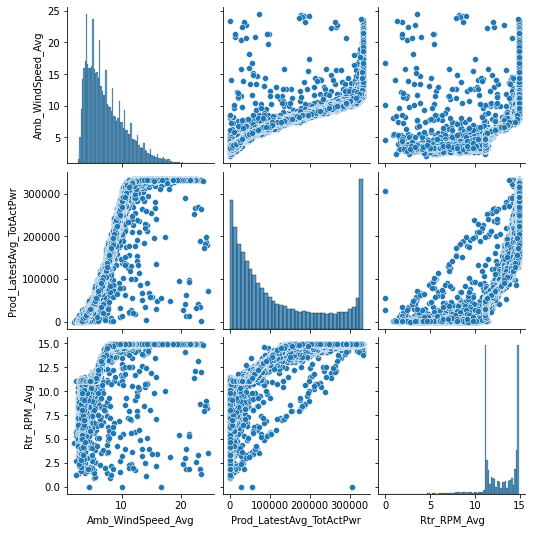

In [68]:
sns.pairplot(X)

In [69]:
# K-Means algorithm on standardized data
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=100, max_iter=1000)
kmeans.fit(X_std)

KMeans(max_iter=1000, n_clusters=3, n_init=100)

In [70]:
# structure metric for selected turbine

# takes few mins...
print("Mean Silhouette Coefficient for selected turbine is " +
      str(np.round(metrics.silhouette_score(X_std, kmeans.labels_, metric='euclidean'), 2)))

# results:
# SC_T01 = 0.56~
# SC_T06 = 0.57~
# SC_T07 = 0.57~
# SC_T09 = 0.56~
# SC_T11 = 0.56~

Mean Silhouette Coefficient for selected turbine is 0.57


In [71]:
# centroids = 3 working regions for wind turbines (low power, medium power, high power)
kmeans_centers = pd.DataFrame(np.round(scaler.inverse_transform(kmeans.cluster_centers_), 2), columns=X.columns)
kmeans_centers.sort_values("Prod_LatestAvg_TotActPwr")

,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,Rtr_RPM_Avg
0,4.78,31977.14,10.95
2,7.78,144687.77,13.79
1,12.30,307568.62,14.84


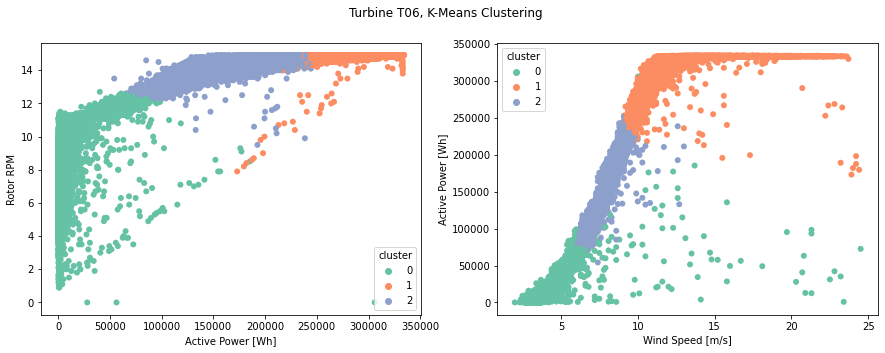

In [72]:
# K-Means Clustering result 2D plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x="Prod_LatestAvg_TotActPwr", y="Rtr_RPM_Avg", data=X, hue=kmeans.labels_, ax=ax1,
                palette="Set2", linewidth=0)
sns.scatterplot(x="Amb_WindSpeed_Avg", y="Prod_LatestAvg_TotActPwr", data=X, hue=kmeans.labels_, ax=ax2,
               palette="Set2", linewidth=0)

ax1.legend(title="cluster", loc="lower right")
ax2.legend(title="cluster", loc="upper left")

ax1.set_xlabel("Active Power [Wh]")
ax1.set_ylabel("Rotor RPM")

ax2.set_xlabel("Wind Speed [m/s]")
ax2.set_ylabel("Active Power [Wh]")

fig.suptitle("Turbine " + test.Turbine_ID.iloc[0] + ", K-Means Clustering")

plt.savefig("../img/structure.png")